<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.665051,38.125701,45.866251,0.612650,117.269653,116.667562,0.602090
1,0.0,1.0,45.494649,88.272024,92.068827,0.166035,236.001535,235.858270,0.143265
2,0.0,2.0,64.473943,64.308542,32.273932,0.087373,171.143790,171.136051,0.007739
3,0.0,3.0,72.911664,84.108158,30.749204,-0.102727,197.666298,197.876093,-0.209795
4,0.0,4.0,65.162389,32.750521,58.824827,0.012764,166.750500,166.754532,-0.004032
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,80.007208,56.402777,89.107525,0.946976,236.464486,235.587842,0.876644
249996,999.0,246.0,38.848095,62.918808,41.162095,-0.373686,152.555311,152.835262,-0.279950
249997,999.0,247.0,92.674595,43.359293,50.849687,-0.690274,196.193301,196.891095,-0.697794
249998,999.0,248.0,69.999960,22.640942,68.627028,0.011526,171.279456,171.227823,0.051632


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    22.665051  38.125701  45.866251  ...  117.269653  116.667562  0.602090
      1.0    45.494649  88.272024  92.068827  ...  236.001535  235.858270  0.143265
      2.0    64.473943  64.308542  32.273932  ...  171.143790  171.136051  0.007739
      3.0    72.911664  84.108158  30.749204  ...  197.666298  197.876093 -0.209795
      4.0    65.162389  32.750521  58.824827  ...  166.750500  166.754532 -0.004032
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  80.007208  56.402777  89.107525  ...  236.464486  235.587842  0.876644
      246.0  38.848095  62.918808  41.162095  ...  152.555311  152.835262 -0.279950
      247.0  92.674595  43.359293  50.849687  ...  196.193301  196.891095 -0.697794
      248.0  69.999960  22.640942  68.627028  ...  171.279456  171.227823  0.051632
      249.0  57.423253  33.556854  78.481087  ...  177.873071  179.429225 -1.556154

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    22.665051  38.125701  45.866251  ...  117.269653  116.667562  0.602090
      1.0    45.494649  88.272024  92.068827  ...  236.001535  235.858270  0.143265
      2.0    64.473943  64.308542  32.273932  ...  171.143790  171.136051  0.007739
      3.0    72.911664  84.108158  30.749204  ...  197.666298  197.876093 -0.209795
      4.0    65.162389  32.750521  58.824827  ...  166.750500  166.754532 -0.004032
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  80.007208  56.402777  89.107525  ...  236.464486  235.587842  0.876644
      246.0  38.848095  62.918808  41.162095  ...  152.555311  152.835262 -0.279950
      247.0  92.674595  43.359293  50.849687  ...  196.193301  196.891095 -0.697794
      248.0  69.999960  22.640942  68.627028  ...  171.279456  171.227823  0.051632
      249.0  57.423253  33.556854  78.481087  ...  177.873071  179.429225 -1.556154

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.665051,38.125701,45.866251,0.612650,117.269653,116.667562,0.602090
1,0.0,1.0,45.494649,88.272024,92.068827,0.166035,236.001535,235.858270,0.143265
2,0.0,2.0,64.473943,64.308542,32.273932,0.087373,171.143790,171.136051,0.007739
3,0.0,3.0,72.911664,84.108158,30.749204,-0.102727,197.666298,197.876093,-0.209795
4,0.0,4.0,65.162389,32.750521,58.824827,0.012764,166.750500,166.754532,-0.004032
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,80.007208,56.402777,89.107525,0.946976,236.464486,235.587842,0.876644
249996,999.0,246.0,38.848095,62.918808,41.162095,-0.373686,152.555311,152.835262,-0.279950
249997,999.0,247.0,92.674595,43.359293,50.849687,-0.690274,196.193301,196.891095,-0.697794
249998,999.0,248.0,69.999960,22.640942,68.627028,0.011526,171.279456,171.227823,0.051632


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    22.665051  38.125701  45.866251  ...  117.269653  116.667562  0.602090
      1.0    45.494649  88.272024  92.068827  ...  236.001535  235.858270  0.143265
      2.0    64.473943  64.308542  32.273932  ...  171.143790  171.136051  0.007739
      3.0    72.911664  84.108158  30.749204  ...  197.666298  197.876093 -0.209795
      4.0    65.162389  32.750521  58.824827  ...  166.750500  166.754532 -0.004032
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  80.007208  56.402777  89.107525  ...  236.464486  235.587842  0.876644
      246.0  38.848095  62.918808  41.162095  ...  152.555311  152.835262 -0.279950
      247.0  92.674595  43.359293  50.849687  ...  196.193301  196.891095 -0.697794
      248.0  69.999960  22.640942  68.627028  ...  171.279456  171.227823  0.051632
      249.0  57.423253  33.556854  78.481087  ...  177.873071  179.429225 -1.556154

[250000 rows x 7 columns]

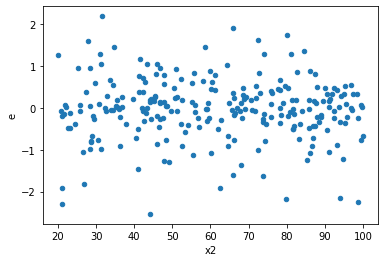

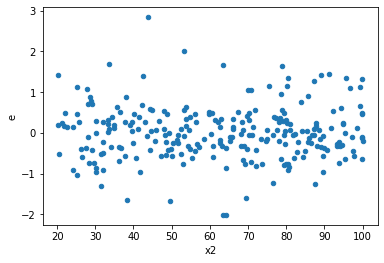

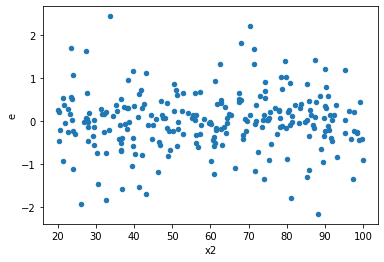

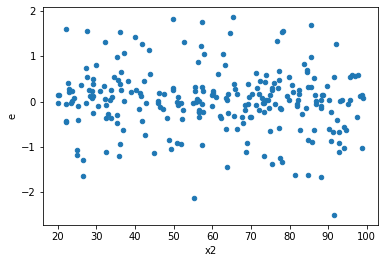

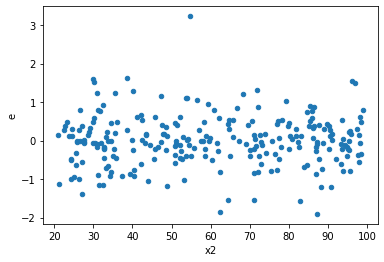

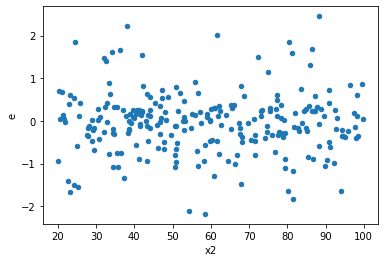

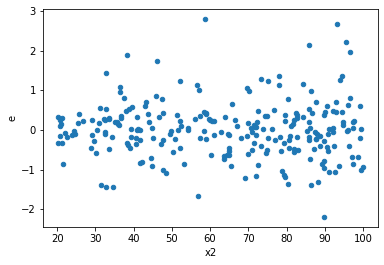

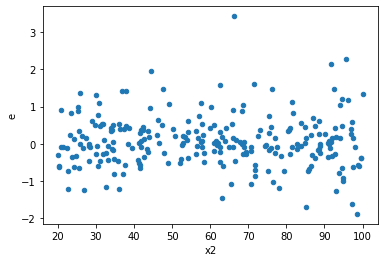

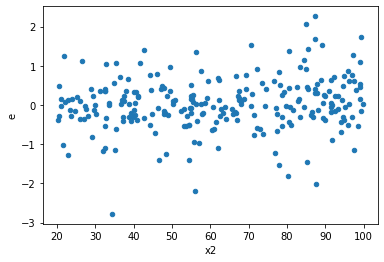

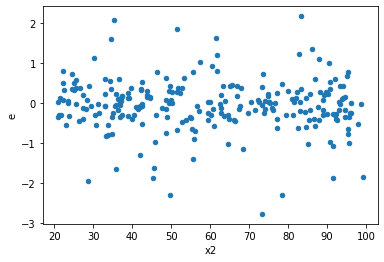

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,129.0,115.0,62.117302301381905,69.35767131679444,0.4815294752045109,0.6031101853634299,1.2524886147567234,0.21820212700148112,0.8908989364992594,0.10910106350074056,Reject005=1 : Homoscedasticity
2.0,115.0,129.0,47.75852910274573,67.20468390584497,0.4152915574151803,0.520966541905775,1.254459746661664,0.21048258879382686,0.8947587056030866,0.10524129439691343,Reject005=1 : Homoscedasticity
3.0,111.0,133.0,48.06336477717367,63.04261616661755,0.43300328628084384,0.4740046328317109,1.0946906128658658,0.6152092693019866,0.6923953653490067,0.3076046346509933,Reject005=1 : Homoscedasticity
8.0,104.0,140.0,46.85540335591064,72.29486006222236,0.45053272457606386,0.5163918575873025,1.1461805756134804,0.45028950884107033,0.7748552455794648,0.22514475442053516,Reject005=1 : Homoscedasticity
10.0,121.0,123.0,65.15334181602226,67.75728740248829,0.5384573703803492,0.5508722553047828,1.0230563933327983,0.8996343019734976,0.5501828490132512,0.4498171509867488,Reject005=1 : Homoscedasticity
13.0,124.0,120.0,57.045146001747554,56.298839225050166,0.46004150001409316,0.46915699354208473,1.019814502664895,0.9146895714201333,0.5426552142899334,0.45734478571006665,Reject005=1 : Homoscedasticity
18.0,125.0,119.0,47.99230384713476,61.82231445937702,0.38393843077707807,0.5195152475577901,1.353121245264011,0.09700916701634354,0.9514954164918282,0.04850458350817177,Reject005=1 : Homoscedasticity
23.0,122.0,122.0,57.29874652768466,64.12788604442731,0.4696618567843005,0.5256384102002238,1.1191847977589362,0.5349809945126973,0.7325095027436513,0.26749049725634866,Reject005=1 : Homoscedasticity
24.0,115.0,129.0,51.52428455827988,67.46978101529524,0.4480372570285207,0.5230215582581026,1.1673617540802161,0.39212674725394603,0.803936626373027,0.19606337362697301,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,115.0,62.117302301381905,69.35767131679444,0.4815294752045109,0.6031101853634299,1.2524886147567234,0.21820212700148112,Reject005=1 : Homoscedasticity
1.0,109.0,135.0,75.07634195610635,82.55528242955349,0.6887737794138197,0.6115206105892851,0.8878395619382015,0.5196537415540703,Reject005=1 : Homoscedasticity
2.0,115.0,129.0,47.75852910274573,67.20468390584497,0.4152915574151803,0.520966541905775,1.254459746661664,0.21048258879382686,Reject005=1 : Homoscedasticity
3.0,111.0,133.0,48.06336477717367,63.04261616661755,0.43300328628084384,0.4740046328317109,1.0946906128658658,0.6152092693019866,Reject005=1 : Homoscedasticity
4.0,126.0,118.0,77.56058528172608,42.35017463015919,0.6155602006486196,0.35889978500134906,0.5830457924719209,0.003030595147315311,Reject005=0 : Heteroscedasticity
5.0,130.0,114.0,87.02679505161753,47.54655666611735,0.6694368850124425,0.41707505847471354,0.6230237201031454,0.009119590322448336,Reject005=0 : Heteroscedasticity
6.0,110.0,134.0,68.53606272613139,82.01205412477188,0.6230551156921036,0.6120302546624767,0.9823051592837334,0.9267649612389857,Reject005=1 : Homoscedasticity
7.0,130.0,114.0,66.53222178365753,38.54437220300648,0.5117863214127503,0.33810852809654807,0.6606439327319714,0.022258521974845367,Reject005=0 : Heteroscedasticity
8.0,104.0,140.0,46.85540335591064,72.29486006222236,0.45053272457606386,0.5163918575873025,1.1461805756134804,0.45028950884107033,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      846
Reject005=0 : Heteroscedasticity    154
Name: Result_test, dtype: int64